In [ ]:
import pandas as pd
import numpy as np

# Importing my Features

In [ ]:
df = pd.read_csv("Img_Features_Norm (1).csv")
imgs = df["Unnamed: 0"]
imgs = list(imgs)
df.index = imgs
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Variance,EM Variance,Local Variance,EM Local Variance,Entropy,Crofton Perimeter,Standard Deviation,Partial Derivative Sum,Number of Corners,Average Corner Strength,Sobel V Color Avg,Sobel V Gray Avg,Sobel H Color Avg,Sobel H Gray Avg,Laplacian Positive Color Avg,Laplacian Positive Gray Avg,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,Class
046TE_039500.jpg,0.818257,0.693422,0.673303,0.523358,0.786564,0.420360,0.904576,0.384424,0.197567,0.150730,0.252045,0.534849,0.671998,0.574316,0.871268,0.643220,0.901998,0.900533,1
030FD_069750.jpg,0.229388,0.413471,0.187847,0.207935,0.938648,0.112804,0.478944,0.261055,0.380254,0.210888,0.245834,0.645475,0.536076,0.641298,0.778897,0.651590,0.824483,0.790577,1
030FD_036825.jpg,0.386879,0.581701,0.151492,0.193129,0.980419,0.112804,0.621996,0.155249,0.066847,0.014989,0.334500,0.605327,0.614408,0.588053,0.677562,0.590347,0.754956,0.530097,1
030FD_013375.jpg,0.060758,0.049653,0.228389,0.125328,0.669828,0.112804,0.246492,0.031395,0.035355,0.011874,0.065456,0.057880,0.050329,0.100499,0.177277,0.613944,0.147380,0.572948,1
038RB_064725.jpg,0.558283,0.652509,0.414603,0.316632,0.982594,0.160489,0.747184,0.290692,0.180469,0.061351,0.035937,0.000000,0.035556,0.119365,0.124795,0.600264,0.075910,0.388774,1


# Importing John's Features

In [ ]:
df2 = pd.read_csv("newdata.csv")
df2

,File,sobelv_rat,sobelh_rat,lappos_rat,lapneg_rat,sobelv_gavg,sobelh_gavg,lappos_gavg,lapneg_gavg
0,030FD_070075.jpg,3.294904,2.616644,1.000000,2.162001,0.663535,0.643955,248.814349,2.285475
1,046TE_056100.jpg,2.761612,2.904580,1.001333,1.747453,1.031123,0.596895,245.124902,1.241924
2,030FD_067125.jpg,2.589823,2.472751,1.000047,1.940613,1.084945,0.807962,225.971680,2.185658
3,030FD_013375.jpg,4.967019,5.436649,1.591819,2.927421,0.157926,0.154167,148.306556,1.003548
4,030FD_012225.jpg,11.307782,7.885557,1.304853,3.732939,0.050068,0.105742,141.667546,0.834316
...,...,...,...,...,...,...,...,...,...
913,030FD_068725.jpg,2.621225,2.746352,1.013071,4.047458,2.100091,2.087337,236.058470,4.012546
914,030FD_018075.jpg,2.817199,2.703324,1.000002,2.116785,1.228538,1.131738,239.423174,3.024085
915,030FD_023275.jpg,3.942041,3.300693,1.000317,2.108124,1.237816,1.461566,216.519818,3.375557
916,030FD_014925.jpg,2.367422,2.277146,1.053845,1.691496,1.079561,1.254600,227.545651,2.569180


# Combining the two DFs

In [ ]:
new_cols = ["sobelv_rat", "sobelh_rat", "lappos_rat", "lapneg_rat", "sobelv_gavg", "sobelh_gavg", "lappos_gavg", "lapneg_gavg"]
for new_col in new_cols:
  df.insert(0, new_col, [1.0]*len(df))

for i in range(len(df)):
  for j in range(len(df2)):
    if df.index[i] == df2["File"][j]:
      for new_col in new_cols:
        df[new_col][i] = df2[new_col][j] / max(df2[new_col])

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,lapneg_gavg,lappos_gavg,sobelh_gavg,sobelv_gavg,lapneg_rat,lappos_rat,sobelh_rat,sobelv_rat,Variance,EM Variance,...,Average Corner Strength,Sobel V Color Avg,Sobel V Gray Avg,Sobel H Color Avg,Sobel H Gray Avg,Laplacian Positive Color Avg,Laplacian Positive Gray Avg,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,Class
046TE_039500.jpg,0.365735,0.705713,0.268958,0.582356,0.131573,0.706425,0.499704,0.117938,0.818257,0.693422,...,0.150730,0.252045,0.534849,0.671998,0.574316,0.871268,0.643220,0.901998,0.900533,1
030FD_069750.jpg,0.578400,0.997828,0.409214,0.555542,0.090684,0.628212,0.367294,0.100673,0.229388,0.413471,...,0.210888,0.245834,0.645475,0.536076,0.641298,0.778897,0.651590,0.824483,0.790577,1
030FD_036825.jpg,0.472506,0.979063,0.179491,0.407773,0.130558,0.628212,0.500957,0.133317,0.386879,0.581701,...,0.014989,0.334500,0.605327,0.614408,0.588053,0.677562,0.590347,0.754956,0.530097,1
030FD_013375.jpg,0.209835,0.581594,0.064313,0.072409,0.121630,1.000000,0.689444,0.217709,0.060758,0.049653,...,0.011874,0.065456,0.057880,0.050329,0.100499,0.177277,0.613944,0.147380,0.572948,1
038RB_064725.jpg,0.533286,0.875008,0.225371,0.586662,0.115829,0.628902,0.547681,0.138709,0.558283,0.652509,...,0.061351,0.035937,0.000000,0.035556,0.119365,0.124795,0.600264,0.075910,0.388774,1


# Store data in arrays

In [ ]:
np.array(df.loc[imgs[0]][:-1])
X = []
y = []
for img in imgs:
  X.append(df.loc[img][:-1]) # append everything but class
  y.append(df.loc[img][-1]) # append class

X = np.array(X)
y = np.array(y)

# Ranking Model Importance using Random Forest Classifier

lapneg_gavg :  0.04
lappos_gavg :  0.01
sobelh_gavg :  0.12
sobelv_gavg :  0.05
lapneg_rat :  0.0
lappos_rat :  0.01
sobelh_rat :  0.0
sobelv_rat :  0.0
Variance :  0.01
EM Variance :  0.03
Local Variance :  0.0
EM Local Variance :  0.0
Entropy :  0.01
Crofton Perimeter :  0.0
Standard Deviation :  0.01
Partial Derivative Sum :  0.06
Number of Corners :  0.11
Average Corner Strength :  0.18
Sobel V Color Avg :  0.24
Sobel V Gray Avg :  0.03
Sobel H Color Avg :  0.01
Sobel H Gray Avg :  0.02
Laplacian Positive Color Avg :  0.02
Laplacian Positive Gray Avg :  0.0
Laplacian Negative Color Avg :  0.03
Laplacian Negative Gray Avg :  0.01


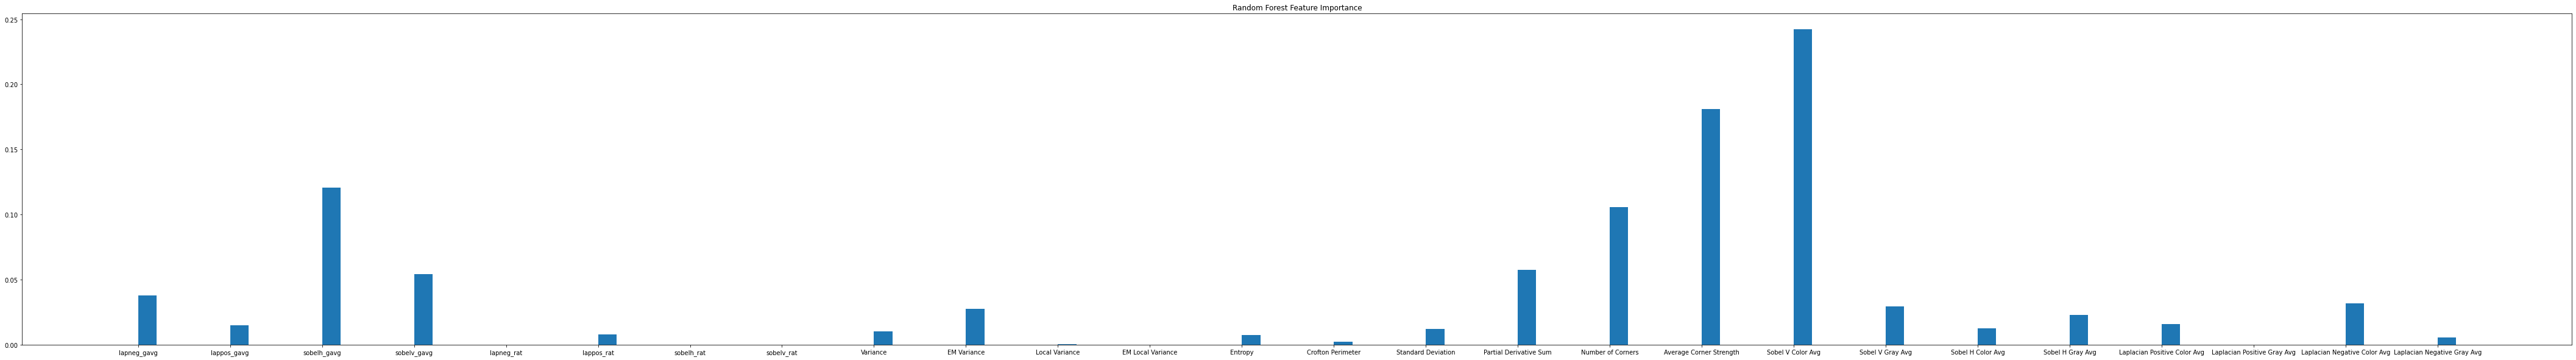

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X, y)
feats = df.columns[:-1]
imps = regr.feature_importances_

for i in range(len(feats)):
  print(feats[i], ": ", round(imps[i], 2))

plt.figure(figsize=(75, 10))  # width:20, height:3
plt.bar(feats, imps, align='edge', width=0.2)
plt.title("Random Forest Feature Importance")
plt.show()

# Split into train-test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Fine-Tuning ANN

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=75)

Epoch 1/75
24/24 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8364
Epoch 2/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8364
Epoch 3/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8364
Epoch 4/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8364
Epoch 5/75
24/24 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8378
Epoch 6/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8431
Epoch 7/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8457
Epoch 8/75
24/24 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8524
Epoch 9/75
24/24 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.8617
Epoch 10/75
24/24 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8617
Epoch 11/75
24/24 [

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [ 13,  15]], dtype=int32)>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=400)

Epoch 1/400
24/24 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.8364
Epoch 2/400
24/24 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.8763
Epoch 3/400
24/24 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.8896
Epoch 4/400
24/24 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.8896
Epoch 5/400
24/24 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.8936
Epoch 6/400
24/24 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.9056
Epoch 7/400
24/24 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.8923
Epoch 8/400
24/24 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.9096
Epoch 9/400
24/24 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.8976
Epoch 10/400
24/24 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.9003
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [  9,  19]], dtype=int32)>

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8750
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.8856
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.8989
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9029
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9069
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9003
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8989
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.8976
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9176
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[133,   5],
       [  9,  19]], dtype=int32)>

# Only Train on certain features (decided by random forrest classifier)

In [ ]:
def get_spec_feats(X, idxs):
  new_X = []
  for x in range(len(X)):
    new_row = []
    for i in range(len(X[x])):
      if i in idxs:
        new_row.append(X[x][i])
    new_X.append(new_row)
  return np.array(new_X)

feat_dict = {"lapneg_gavg": 0, "lappos_gavg": 1, "sobelh_gavg": 2, "sobelv_gavg": 3, "lapneg_rat": 4, "lappos_rat": 5, 
             "sobelh_rat": 6, "sobelv_rat" : 7, "Variance": 8, "EM Variance": 9, "Local Variance": 10, "EM Local Variance": 11,
             "Entropy": 12, "Crofton Perimeter": 13, "Standard Deviation": 14, "Partial Derivative Sum": 15, "Number of Corners": 16,
             "Average Corner Strength": 17, "Sobel V Color Avg": 18, "Sobel V Gray Avg": 19, "Sobel H Color Avg": 20, "Sobel H Gray Avg": 21,
             "Laplacian Positive Color Avg": 22, "Laplacian Positive Gray Avg": 23, "Laplacian Negative Color Avg": 24, "Laplacian Negative Gray Avg":25}

In [ ]:
new_X_train = get_spec_feats(X_train, [feat_dict["lapneg_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["EM Variance"], 
                             feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
                             feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Laplacian Negative Color Avg"]])

new_X_test = get_spec_feats(X_test, [feat_dict["lapneg_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["EM Variance"], 
                             feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
                             feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Laplacian Negative Color Avg"]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(100, activation='elu'),
    tf.keras.layers.Dense(100, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(new_X_train, y_train, epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8551
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8830
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.8963
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9016
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.9043
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9003
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.8870
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.8963
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.8963
Epoch 11/500
24/24 [=

In [ ]:
y_pred = model.predict(new_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[133,   5],
       [  5,  23]], dtype=int32)>

In [ ]:
def check_each(l1, l2):
  all_eq = True
  for i in range(len(l1)):
    if l1[i] != l2[i]:
      all_eq = False
  return all_eq

wrong_x = []
for i in range(len(y_pred_bin)):
  if y_pred_bin[i] != y_test[i]:
    wrong_x.append(X_test[i])

wrong_imgs = []
for img in imgs:
  if sum([check_each(list(df.loc[img][:-1]), i) for i in wrong_x]) == 1:
    wrong_imgs.append((img, df.loc[img][-1]))

print(wrong_imgs)

                  lapneg_gavg  lappos_gavg  sobelh_gavg  sobelv_gavg  \
046TE_039500.jpg     0.365735     0.705713     0.268958     0.582356   
030FD_069750.jpg     0.578400     0.997828     0.409214     0.555542   
030FD_036825.jpg     0.472506     0.979063     0.179491     0.407773   
030FD_013375.jpg     0.209835     0.581594     0.064313     0.072409   
038RB_064725.jpg     0.533286     0.875008     0.225371     0.586662   
...                       ...          ...          ...          ...   
046TE_056325.jpg     0.341376     0.980455     0.421217     0.638519   
030FD_001550.jpg     0.862414     0.920412     0.726674     0.925603   
046TE_054625.jpg     0.320258     0.951321     0.326110     0.605948   
030FD_021825.jpg     0.610254     0.880971     0.507625     0.653547   
030FD_067725.jpg     0.527833     0.995676     0.353341     0.419953   

                  lapneg_rat  lappos_rat  sobelh_rat  sobelv_rat  Variance  \
046TE_039500.jpg    0.131573    0.706425    0.499704    0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(new_X_train, y_train, epochs=350)

Epoch 1/350
24/24 [==============================] - 1s 4ms/step - loss: 0.3835 - accuracy: 0.8138
Epoch 2/350
24/24 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.8856
Epoch 3/350
24/24 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.8910
Epoch 4/350
24/24 [==============================] - 0s 4ms/step - loss: 0.3043 - accuracy: 0.8604
Epoch 5/350
24/24 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9029
Epoch 6/350
24/24 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9043
Epoch 7/350
24/24 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.8896
Epoch 8/350
24/24 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9043
Epoch 9/350
24/24 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9016
Epoch 10/350
24/24 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.9029
Epoch 11/

In [ ]:
y_pred = model.predict(new_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [  6,  22]], dtype=int32)>

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


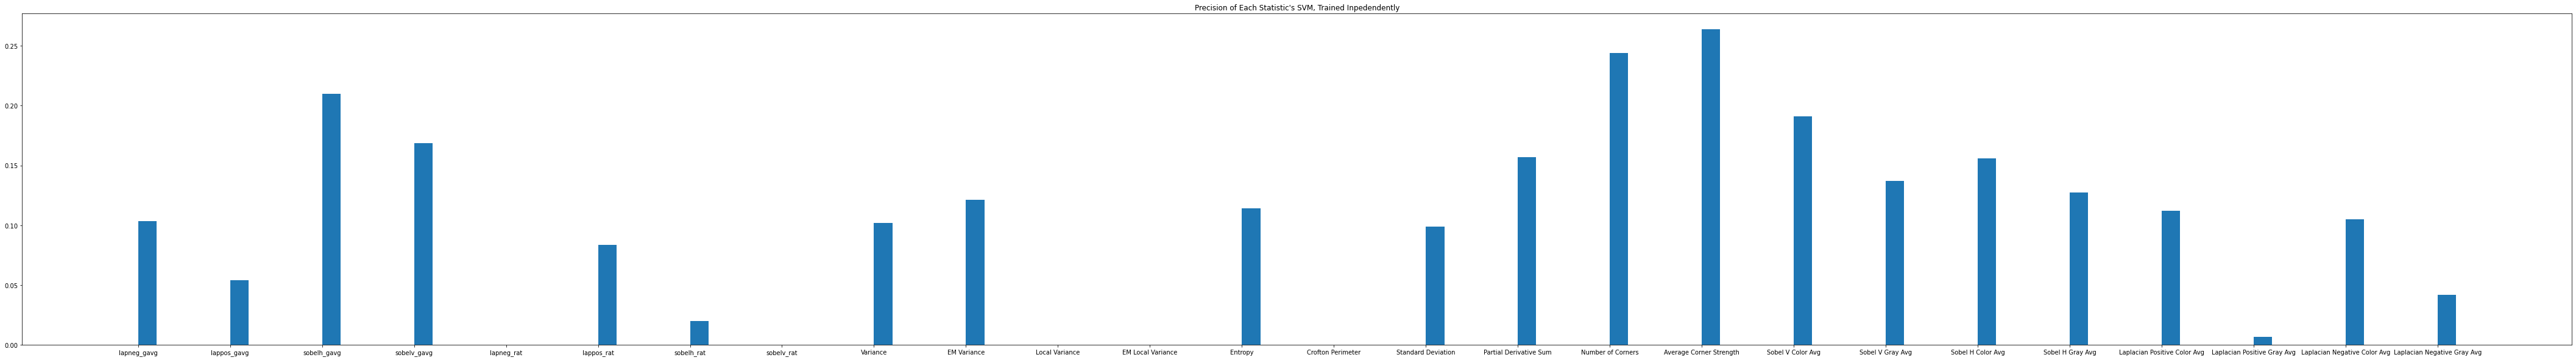

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import metrics

all_X = list(X_train) + list(X_test)
all_y = list(y_train) + list(y_test)
scores = []

features = df.drop(["Class"], axis=1).columns
for feat in features:
  feat_X = get_spec_feats(all_X, [feat_dict[feat]])
  clf = svm.SVC()
  clf.fit(np.array(feat_X), np.array(all_y))
  preds = clf.predict(np.array(feat_X))
  scores.append(metrics.average_precision_score(np.array(preds).reshape(-1,1), np.array(all_y)))

#plt.bar(features, scores)
plt.figure(figsize=(75, 10))  # width:20, height:3
plt.bar(features, scores, align='edge', width=0.2)
plt.title("Precision of Each Statistic's SVM, Trained Inpedendently")
plt.show()

In [ ]:
new_X_train = get_spec_feats(X_train, [feat_dict["lapneg_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["lappos_rat"],
                                       feat_dict["EM Variance"], feat_dict["Variance"], feat_dict["Entropy"], feat_dict["Standard Deviation"],
                                       feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
                                       feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Sobel H Color Avg"], 
                                       feat_dict["Sobel H Gray Avg"], feat_dict["Laplacian Positive Color Avg"], feat_dict["Laplacian Negative Color Avg"]])

new_X_test = get_spec_feats(X_test, [feat_dict["lapneg_gavg"], feat_dict["sobelh_gavg"], feat_dict["sobelv_gavg"], feat_dict["lappos_rat"],
                                       feat_dict["EM Variance"], feat_dict["Variance"], feat_dict["Entropy"], feat_dict["Standard Deviation"],
                                       feat_dict["Partial Derivative Sum"], feat_dict["Number of Corners"], feat_dict["Average Corner Strength"], 
                                       feat_dict["Sobel V Color Avg"], feat_dict["Sobel V Gray Avg"], feat_dict["Sobel H Color Avg"], 
                                       feat_dict["Sobel H Gray Avg"], feat_dict["Laplacian Positive Color Avg"], feat_dict["Laplacian Negative Color Avg"]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(new_X_train, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 5ms/step - loss: 0.3916 - accuracy: 0.8444
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2766 - accuracy: 0.8803
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.8989
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.8763
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.8976
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.8936
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.8989
Epoch 8/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.8989
Epoch 9/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.9069
Epoch 10/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9029
Epoch 11/

In [ ]:
y_pred = model.predict(new_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [  6,  22]], dtype=int32)>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(new_X_train, y_train, epochs=300)

Epoch 1/300
24/24 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8364
Epoch 2/300
24/24 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8497
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.8870
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.8936
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.8949
Epoch 6/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.8963
Epoch 7/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9043
Epoch 8/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9082
Epoch 9/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9003
Epoch 10/300
24/24 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.9029
Epoch 11/

In [ ]:
y_pred = model.predict(new_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[133,   5],
       [  5,  23]], dtype=int32)>